In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from server_queue import server_system

In [58]:
def get_energy_level(arr_x):
    num_amount = np.shape(arr_x)[0]
    total_eng = 0
    for i in range(num_amount):
        for j in range(i+1,num_amount):
            total_eng += 1/np.linalg.norm(arr_x[i]-arr_x[j])
    return total_eng

def generate_n_samples(n):
    arr_coord = (np.random.rand(n,2))-0.5
    return arr_coord
    
    
def iterate_rand_charges(arr_x,prob=1 ,dist=0.5):
    num_amount = np.shape(arr_x)[0]
    copy_arr_x = arr_x.copy()
    last_energy = get_energy_level(copy_arr_x)
    for i in range(num_amount):
        copy_arr_x[i]+=((np.random.rand(2)*2)-1)*dist
        while (np.linalg.norm(copy_arr_x)>1):
               copy_arr_x[i]= arr_x[i]+((np.random.rand(2)*2)-1)*dist
        if(get_energy_level(copy_arr_x)>last_energy):
            copy_arr_x[i] =arr_x[i]
    return copy_arr_x

def iterate_n_times(arr_x,n,prob=1 ,dist=0.5):
    copy_arr_x = arr_x.copy()
    for i in range(n):
        copy_arr_x = iterate_rand_charges(copy_arr_x,prob=prob ,dist=dist)
    return copy_arr_x

In [51]:
get_energy_level(charges)

2.6612578127933153

In [68]:
new_charges = iterate_n_times(new_charges,100,prob=1 ,dist=0.5)
get_energy_level(new_charges)

0.70942199353239

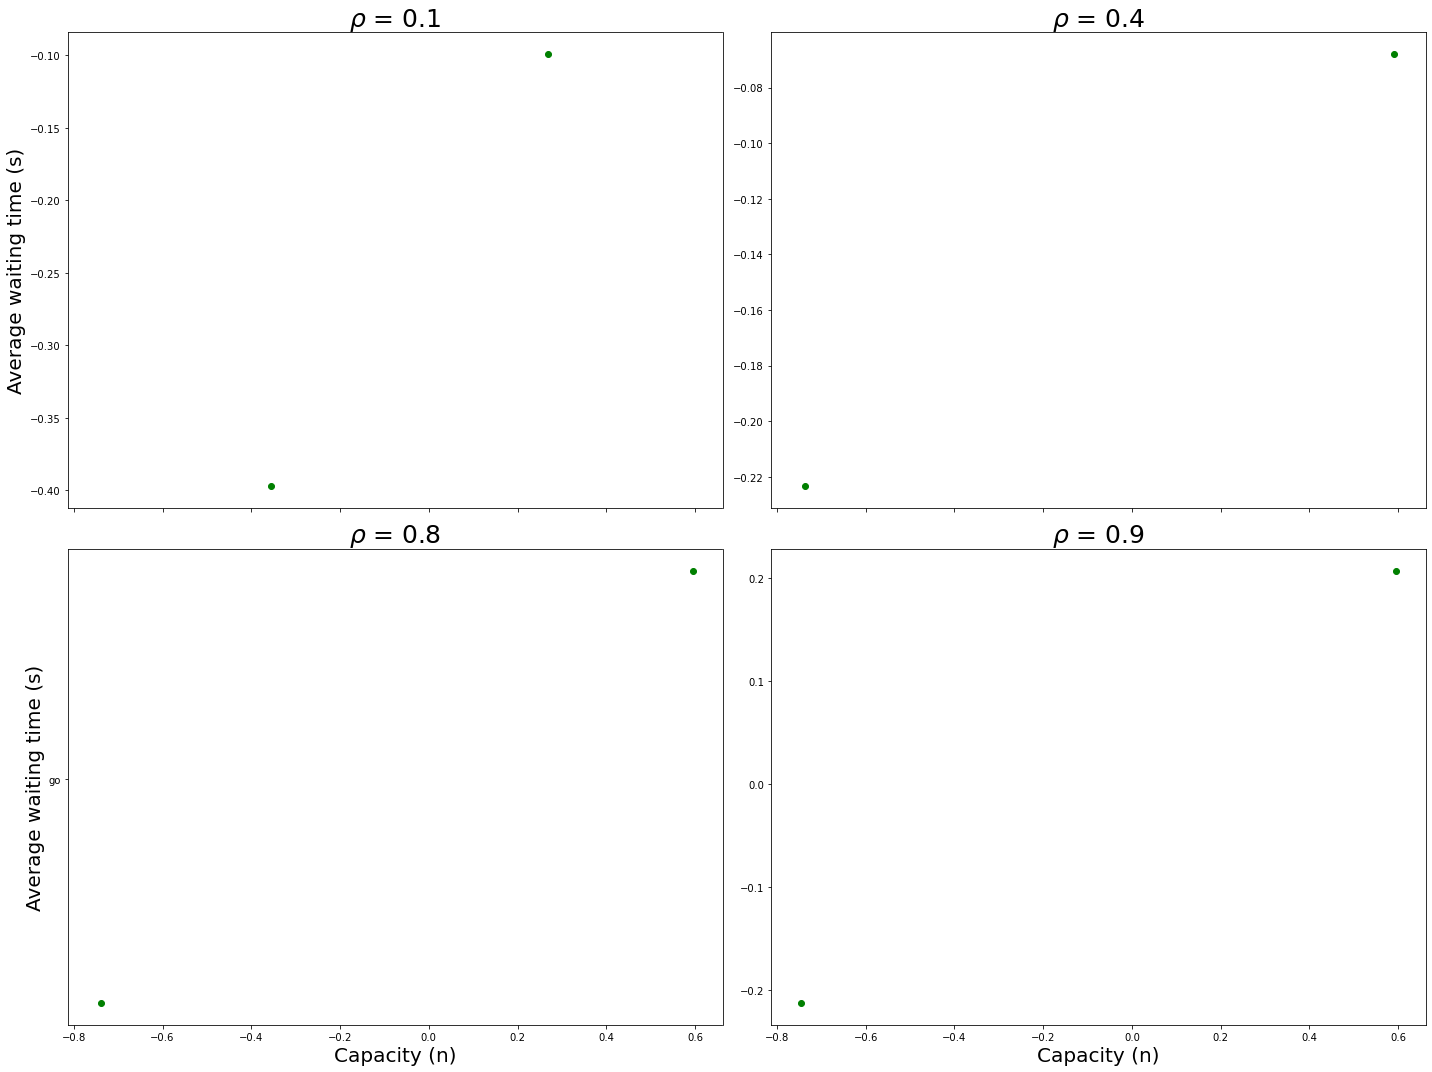

In [72]:
fig, axs = plt.subplots(2, 2, figsize = (20, 15), sharex = True)

new_charges = generate_n_samples(2)
get_energy_level(new_charges)

axs[0,0].plot(new_charges.T[0],new_charges.T[1],"go")
new_charges = iterate_n_times(new_charges,10,prob=1 ,dist=0.5)
get_energy_level(new_charges)
axs[0,1].plot(new_charges.T[0],new_charges.T[1],"go")
new_charges = iterate_n_times(new_charges,100,prob=1 ,dist=0.5)
get_energy_level(new_charges)
axs[1,0].plot(new_charges.T[0],new_charges.T[1],"go","go")
new_charges = iterate_n_times(new_charges,1000,prob=1 ,dist=0.5)

get_energy_level(new_charges)
axs[1,1].plot(new_charges.T[0],new_charges.T[1],"go")
    
axs[0,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[1,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[1,0].set_xlabel('Capacity (n)', fontsize = 20)
axs[1,1].set_xlabel('Capacity (n)', fontsize = 20)

axs[1,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[1,0].set_xlabel('Capacity (n)', fontsize = 20)
axs[1,1].set_xlabel('Capacity (n)', fontsize = 20)

axs[0,0].set_title(r'$\rho$ = 0.1', fontsize = 25)
axs[0,1].set_title(r'$\rho$ = 0.4', fontsize = 25)
axs[1,0].set_title(r'$\rho$ = 0.8', fontsize = 25)
axs[1,1].set_title(r'$\rho$ = 0.9', fontsize = 25)

plt.tight_layout()
plt.savefig('md_vs_mh.pdf')
plt.show()

In [73]:
get_energy_level(new_charges)

0.7117013366849886